In [ ]:
!pip install --upgrade tensorflow

# Download dataset

In [2]:
!gdown 1pGtXw8ldwaL331MjQIsmZW-CHbGDGgBC
!gdown 14bPap2G5ruqeUgnkk2e7nP9KFqDWjZDh

Downloading...
From: https://drive.google.com/uc?id=1pGtXw8ldwaL331MjQIsmZW-CHbGDGgBC
To: /content/y.npy
100% 4.36k/4.36k [00:00<00:00, 16.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=14bPap2G5ruqeUgnkk2e7nP9KFqDWjZDh
To: /content/X.npy
100% 42.4M/42.4M [00:00<00:00, 65.1MB/s]


# Import modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Preprocess the data we collected

In [ ]:
# Load the data
X_raw = np.load('X.npy')
y_raw = np.load('y.npy')

le = LabelEncoder()

if y_raw.dtype.type is np.str_:
    y = le.fit_transform(y_raw)

# Normalize the data
X_raw = X_raw.astype('float32') / 255.0

# Preallocate memory for X
size = (28, 28)
X = np.empty((X_raw.shape[0], size[0], size[1]))

# Resize the images
for i in range(X_raw.shape[0]):
    X[i] = resize(X_raw[i], size)

# Just one hot encoding and then mapping to decode later on

In [ ]:
# Create a dictionary mapping original labels to encoded labels
label_mapping = {original: encoded for encoded, original in enumerate(le.classes_)}
label_mapping

{'あ': 0, 'い': 1, 'う': 2, 'え': 3, 'お': 4}

In [ ]:
# Create a dictionary mapping encoded labels to original labels
inverse_label_mapping = {v: k for k, v in label_mapping.items()}
inverse_label_mapping

{0: 'あ', 1: 'い', 2: 'う', 3: 'え', 4: 'お'}

In [ ]:
X_raw.shape

(1059, 200, 200)

In [ ]:
y_raw.shape

(1059,)

# Graphs about our data distribution

[]

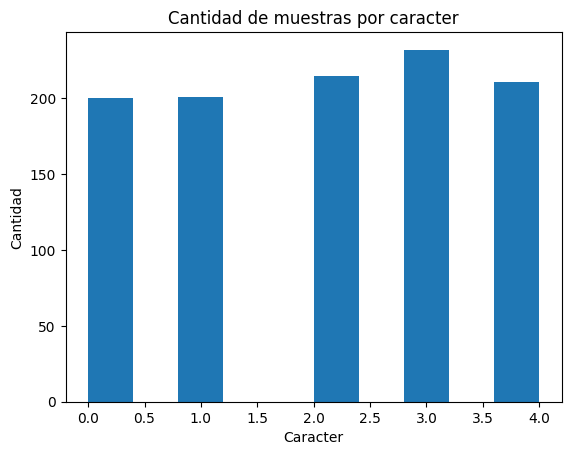

In [ ]:
plt.figure()
plt.title("Cantidad de muestras por caracter")
plt.ylabel("Cantidad")
plt.xlabel("Caracter")
plt.hist(y, bins=10)
plt.plot()

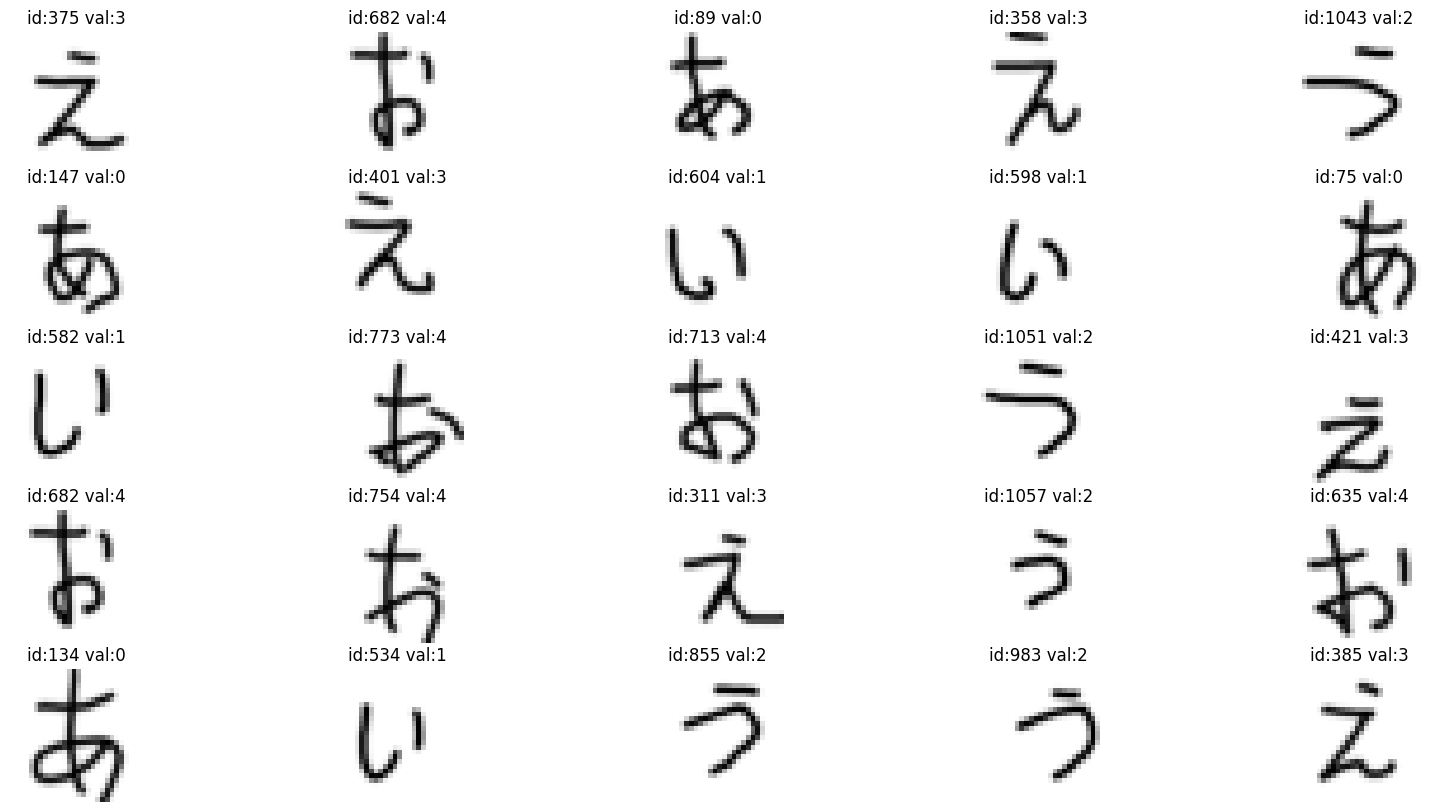

In [ ]:
plt.figure(figsize=(20,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    idx = np.random.choice(X.shape[0], 1)[0]
    plt.title('id:{} val:{}'.format(idx, y[idx] ))
    plt.imshow(-X[idx], cmap='gray')
    plt.axis('off')
plt.show()

# Split the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17, stratify=y)

In [ ]:
print(X_train.dtype, y_train.dtype, X_test.dtype, y_test.dtype)

float64 int64 float64 int64


# Moar graphs

[]

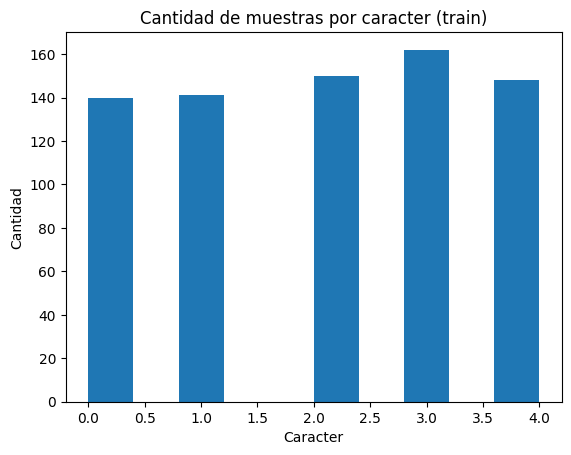

In [ ]:
plt.figure()
plt.title("Cantidad de muestras por caracter (train)")
plt.ylabel("Cantidad")
plt.xlabel("Caracter")
plt.hist(y_train, bins=10)
plt.plot()

[]

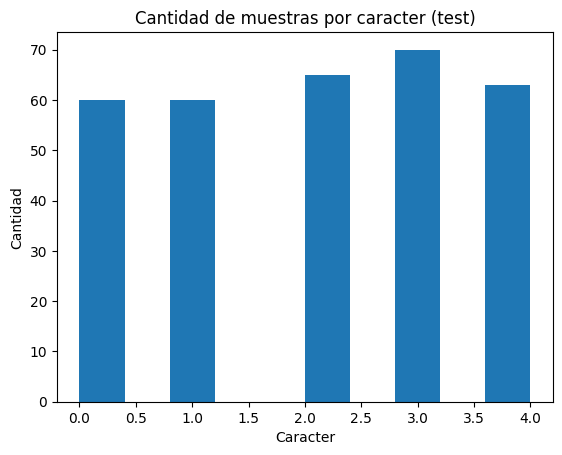

In [ ]:
plt.figure()
plt.title("Cantidad de muestras por caracter (test)")
plt.ylabel("Cantidad")
plt.xlabel("Caracter")
plt.hist(y_test, bins=10)
plt.plot()

# Here we adjust the dimension of the images
Because CNNs expect a 4D array

In [ ]:
if X_train.ndim == 3:
    X_train = X_train[...,None]
    X_test = X_test[..., None]
    print(X_train.shape, X_test.shape)

(741, 28, 28, 1) (318, 28, 28, 1)


# The model
I was desperate it had overfitting, then fixed it. Finally got chickened out because the training was way too fast and change it to Adam optimizer which I'm more familiar with.

Some benefits to choose Adam over SGD

- Efficiency: Adam is computationally efficient and has very little memory requirements.

- Parameter Updates: Adam performs parameter updates using the concept of momentum by adding fractions of previous gradients to current ones, which helps to converge faster.

- Adaptive Learning Rate: Adam uses adaptive learning rates, which means it uses different learning rates for different parameters. This is beneficial when dealing with sparse data or dealing with features that require less updating.

- Robust: Adam is quite robust to the choice of hyperparameters and the initial values.

And all of that for nothing because i got back to use SGD

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.optimizers import SGD
#from tensorflow.keras.optimizers import RMSprop
#from keras.optimizers import Adam

bs = 16
lr = 0.0005

model = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(*size, 1)),
    MaxPool2D(),
    Dropout(0.2),
    Conv2D(64, 3, activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.2),
    Conv2D(128, 3, activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

#optimizer = Adam(learning_rate=lr)
#optimizer = RMSprop(learning_rate=0.0001, clipvalue=1.0)
optimizer = SGD(learning_rate=lr)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])



model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 6, 6, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 240,901 (941.02 KB)

 Trainable params: 240,901 (941.02 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

In [ ]:
log = model.fit(X_train, y_train, batch_size=bs, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - accuracy: 0.2165 - loss: 1.6127 - val_accuracy: 0.2453 - val_loss: 1.6080
Epoch 2/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.1888 - loss: 1.6120 - val_accuracy: 0.2484 - val_loss: 1.6070
Epoch 3/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2332 - loss: 1.6083 - val_accuracy: 0.2579 - val_loss: 1.6060
Epoch 4/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2328 - loss: 1.6092 - val_accuracy: 0.2547 - val_loss: 1.6050
Epoch 5/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2129 - loss: 1.6036 - val_accuracy: 0.2704 - val_loss: 1.6040
Epoch 6/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2013 - loss: 1.6077 - val_accuracy: 0.2547 - val_loss: 1.6030
Epoch 7/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2114 - loss: 1.6081 - val_accuracy: 0.2516 - val_loss: 1.6020
Epoch 8/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2607 - loss: 1.6007 - val_accuracy: 0.2516

# Time to show the perfomance of the model

In [ ]:
def show_results(model, log):
    loss, acc = model.evaluate(X_test, y_test, batch_size=512, verbose=False)
    print(f'Loss     = {loss:.4f}')
    print(f'Accuracy = {acc:.4f}')
    val_loss = log.history['val_loss']
    val_acc = log.history['val_accuracy']
    fig, axes = plt.subplots(1, 2, figsize=(14,4))
    ax1, ax2 = axes
    ax1.plot(log.history['loss'], label='train')
    ax1.plot(val_loss, label='test')
    ax1.set_xlabel('epoch'); ax1.set_ylabel('loss')
    ax2.plot(log.history['accuracy'], label='train')
    ax2.plot(val_acc, label='test')
    ax2.set_xlabel('epoch'); ax2.set_ylabel('accuracy')
    for ax in axes: ax.legend()

Loss     = 0.3691
Accuracy = 0.9214


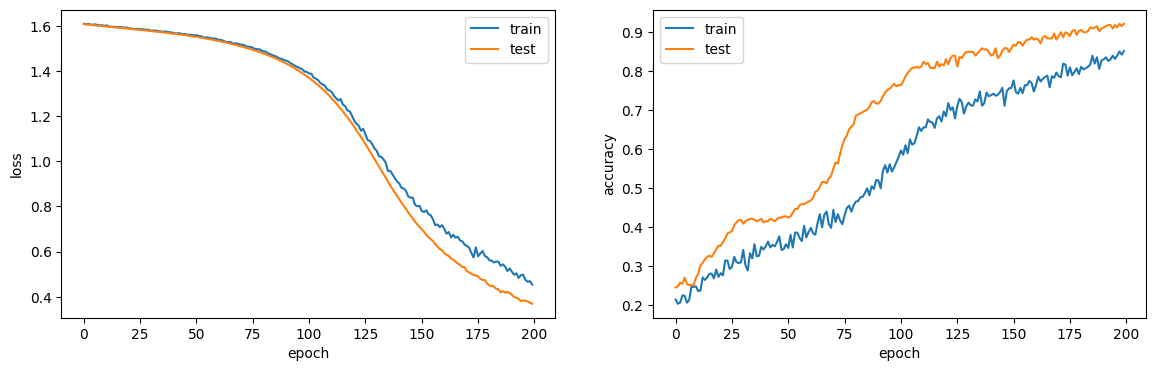

In [ ]:
show_results(model, log)

# Download model

In [3]:
!gdown 1u-SQhwn-tzZF_s58DVJaRn2OTeVllxLU

Downloading...
From: https://drive.google.com/uc?id=1u-SQhwn-tzZF_s58DVJaRn2OTeVllxLU
To: /content/hiragana_predictor.keras
100% 1.00M/1.00M [00:00<00:00, 11.6MB/s]


# Load the model

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('hiragana_predictor.keras', compile=False)

# Just a little test in test samples

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
True label: あ
Predicted label: あ


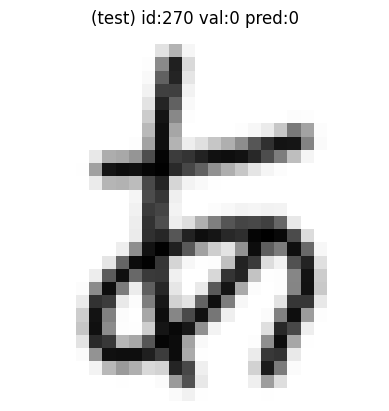

In [ ]:
# Select a random test image
idx = np.random.choice(X_test.shape[0], 1)[0]
im = X_test[idx]
label = y_test[idx]

# Decode the integer label back to a hiragana character using the dictionary
label_decoded = inverse_label_mapping[label]

# Make a prediction using the model
im_reshaped = im.reshape(1, 28, 28, 1)
prediction = model.predict(im_reshaped)
predicted_label = np.argmax(prediction)

# Decode the predicted label back to a hiragana character
predicted_label_decoded = inverse_label_mapping[predicted_label]

# Display the image, its true label, and its predicted label
print(f"True label: {label_decoded}")
print(f"Predicted label: {predicted_label_decoded}")
plt.title('(test) id:{} val:{} pred:{}'.format(idx, label, predicted_label))
plt.axis('off')
plt.imshow(-im[:,:,0], cmap='gray')
plt.show()

# Saving the model

In [ ]:
model.save('hiragana_predictor.keras')